We import the dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 

Xy=pd.concat([X,y],axis=1)



We visualize it

In [2]:
print(X)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0

[517 rows x 12 columns]


We encode it (we should have probably waited a little bit before doing it, but it is fine.)

In [3]:
import pandas as pd
import numpy as np

X_encoded = pd.get_dummies(X, columns=['month', 'day'], drop_first=False)

bool_columns = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

We look for duplicates and null values

In [4]:
df=pd.concat([X_encoded,y],axis=1)

df_duplicates=df[df.duplicated(keep='first')]
print("number of rows =", len(df)) 
print("number of duplicated rows =", len(df_duplicates))
print(df_duplicates) 

number of rows = 517
number of duplicated rows = 4
     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  month_oct  \
53   4  3  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...          0   
100  3  4  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...          0   
215  4  4  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...          0   
303  3  6  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...          0   

     month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  day_wed  \
53           0        0        0        0        0        0        0        1   
100          0        0        0        0        1        0        0        0   
215          0        0        0        1        0        0        0        0   
303          0        1        0        0        0        0        0        0   

      area  
53    0.00  
100   0.00  
215  28.66  
303   0.00  

[4 rows x 30 columns]


In [5]:
df_nodup=df.drop_duplicates()
df_nodup.reset_index(drop=True)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,1,0,0,0,0,0,0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,1,0,0,0,0,0,0,1,0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,1,0,0,0,1,0,0,0,0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,1,0,0,0,0,0,0,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,1,0,0,0,6.44
509,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,1,0,0,0,54.29
510,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,1,0,0,0,11.16
511,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,1,0,0,0,0,0.00


In [6]:
df_nodup.isnull().sum()

X            0
Y            0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
month_apr    0
month_aug    0
month_dec    0
month_feb    0
month_jan    0
month_jul    0
month_jun    0
month_mar    0
month_may    0
month_nov    0
month_oct    0
month_sep    0
day_fri      0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
area         0
dtype: int64

We look now at the distribution of values in our dataset.

In [7]:
import seaborn as sns

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>, <Axes: >, <Axes: >]],
      dtype=object)

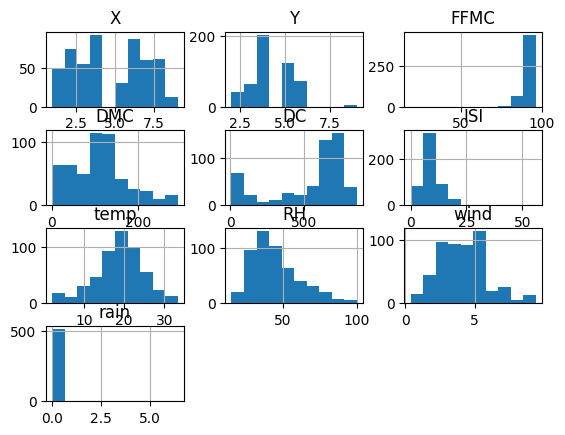

In [8]:
X.hist()

We see some distributions are quite unorthodox, especially X and Y might be susceptible of dividing into clusters. We will not do this, but we leave it as a proposal for further work. 

We look for outliers. 

In [9]:
X_out=X.drop(["month","day"],axis=1)

outliers_index = {}
for column in X_out.columns:
    q1=X_out[column].quantile(0.25)
    q3=X_out[column].quantile(0.75)
    IQR=q3-q1
    print(f"IQR for column {column}: {IQR} {(q1-1.5*IQR,q3+1.5*IQR)}")
    outliers=X_out[column][((X_out[column]<(q1-1.5*IQR)) | (X_out[column]>(q3+1.5*IQR)) )]
    outliers_index[column] = outliers
    print(f"Number of outliers for {column}: {len(outliers)}")
    print(f"Max outlier for {column}: {outliers.max()}")
    print(f"Min outlier for {column}: {outliers.min()}")
  

IQR for column X: 4.0 (np.float64(-3.0), np.float64(13.0))
Number of outliers for X: 0
Max outlier for X: nan
Min outlier for X: nan
IQR for column Y: 1.0 (np.float64(2.5), np.float64(6.5))
Number of outliers for Y: 51
Max outlier for Y: 9
Min outlier for Y: 2
IQR for column FFMC: 2.700000000000003 (np.float64(86.15), np.float64(96.95000000000002))
Number of outliers for FFMC: 53
Max outlier for FFMC: 85.9
Min outlier for FFMC: 18.7
IQR for column DMC: 73.80000000000001 (np.float64(-42.10000000000002), np.float64(253.10000000000002))
Number of outliers for DMC: 17
Max outlier for DMC: 291.3
Min outlier for DMC: 253.6
IQR for column DC: 276.2 (np.float64(23.400000000000034), np.float64(1128.1999999999998))
Number of outliers for DC: 8
Max outlier for DC: 18.7
Min outlier for DC: 7.9
IQR for column ISI: 4.300000000000001 (np.float64(0.049999999999998934), np.float64(17.25))
Number of outliers for ISI: 23
Max outlier for ISI: 56.1
Min outlier for ISI: 0.0
IQR for column temp: 7.3000000000

We seem to have a lot of outliers. 

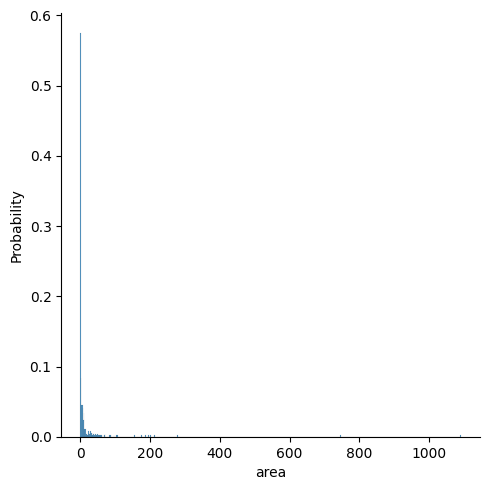

In [10]:
sns.displot(df_nodup,x="area",stat='probability')

The distribution of area is very skewed. We will use a logarithmic transformation to deal with it. We will also try tit for the rest of the columns, although it might not affect them as much. 

In [11]:
outliers_index = {}
q1=df_nodup["area"].quantile(0.25)
q3=df_nodup["area"].quantile(0.75)
IQR=q3-q1
print(f"IQR for column area: {IQR} {(q1-1.5*IQR,q3+1.5*IQR)}")
outliers=df_nodup["area"][((df_nodup["area"]<(q1-1.5*IQR)) | (df_nodup["area"]>(q3+1.5*IQR)) )]
outliers_index["area"] = outliers
print(f"Number of outliers for area: {len(outliers)}")
print(f"Max outlier for area: {outliers.max()}")
print(f"Min outlier for area: {outliers.min()}")
print(outliers)

IQR for column area: 6.57 (np.float64(-9.855), np.float64(16.425))
Number of outliers for area: 62
Max outlier for area: 1090.84
Min outlier for area: 17.2
207    17.20
208    19.23
209    23.41
210    24.23
211    26.00
       ...  
488    46.70
493    43.32
498    40.54
504    49.59
513    54.29
Name: area, Length: 62, dtype: float64


The outliers in area are quite important, we would like to keep as many of them as possible.

In [12]:
columns = ["X", "Y", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "area"]
df_log=df_nodup.copy()
for column in columns:
    df_log[column] = np.log(df_log[column] + 1)

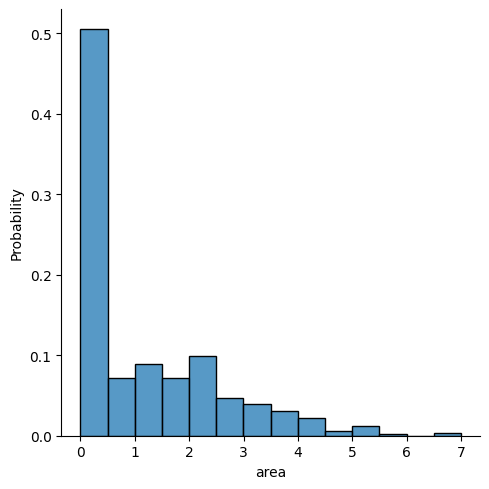

In [13]:
sns.displot(df_log,x="area",stat='probability')

In [14]:
columns = ["X", "Y", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain","area"]
outliers_index = {}
for column in columns:
    q1=df_log[column].quantile(0.25)
    q3=df_log[column].quantile(0.75)
    IQR=q3-q1
    print(f"IQR for column {column}: {IQR} {(q1-1.5*IQR,q3+1.5*IQR)}")
    outliers=df_log[column][((df_log[column]<(q1-1.5*IQR)) | (df_log[column]>(q3+1.5*IQR)) )]
    outliers_index[column] = outliers
    print(f"Number of outliers for {column}: {len(outliers)}")
    print(f"Max outlier for {column}: {outliers.max()}")
    print(f"Min outlier for {column}: {outliers.min()}")

IQR for column X: 0.6931471805599452 (np.float64(0.3465735902799729), np.float64(3.1191623125197534))
Number of outliers for X: 0
Max outlier for X: nan
Min outlier for X: nan
IQR for column Y: 0.18232155679395468 (np.float64(1.3359555772431682), np.float64(2.065241804418987))
Number of outliers for Y: 51
Max outlier for Y: 2.302585092994046
Min outlier for Y: 1.0986122886681098
IQR for column FFMC: 0.029175489133931087 (np.float64(4.469291663379389), np.float64(4.585993619915113))
Number of outliers for FFMC: 54
Max outlier for FFMC: 4.468204330914934
Min outlier for FFMC: 2.9806186357439426
IQR for column DMC: 0.7228733608251456 (np.float64(3.1584545261026555), np.float64(6.049947969403238))
Number of outliers for DMC: 40
Max outlier for DMC: 3.1135153092103742
Min outlier for DMC: 0.7419373447293773
IQR for column DC: 0.48105906063611137 (np.float64(5.369495021182527), np.float64(7.293731263726973))
Number of outliers for DC: 88
Max outlier for DC: 5.303304908059076
Min outlier for 

Even after the logarithmic transformation, there are a lot of outliers, although slightly less, specially in area. We will try treating them and not treating them, since treating them might result in a huge loss of information. 

Let's see if there are meaningful relationships between the variables. 

C:\Users\quinito\AppData\Local\Temp\ipykernel_9284\4093866403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["area"]= df_log["area"]


<Axes: >

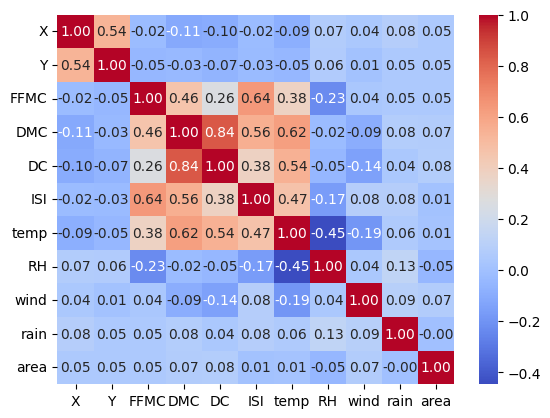

In [15]:

df_numeric=df_log[columns]
df_numeric["area"]= df_log["area"]
corr_matrix_variables = df_numeric.corr()  

sns.heatmap(corr_matrix_variables, annot=True, fmt=".2f", cmap="coolwarm")


The correlations are really poor. 

After trying and getting quite bad results, we will see what happens if we treat outliers. 

Let's see what happens if we drop all of them

In [16]:
for column in columns:
    df_cleaned=df_log.drop(outliers_index[column].index)
df_cleaned.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,1.636649,1.640437,4.514625,4.460786,6.038028,2.202434,2.931444,3.753361,1.545811,0.010786,...,0.029703,0.334653,0.166337,0.144554,0.158416,0.184158,0.118812,0.124752,0.102970,1.040412
std,0.467582,0.237351,0.088995,0.849720,0.963495,0.479484,0.363658,0.354575,0.372420,0.109696,...,0.169935,0.472337,0.372752,0.352000,0.365493,0.387998,0.323888,0.330766,0.304221,1.279983
min,0.693147,1.098612,2.980619,0.741937,2.186051,0.000000,1.163151,2.772589,0.336472,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.386294,1.609438,4.513055,4.128746,6.083816,2.001480,2.797281,3.526361,1.308333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.609438,1.609438,4.528289,4.694096,6.500088,2.240710,3.010621,3.761200,1.609438,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357674
75%,2.079442,1.791759,4.542230,4.957938,6.572702,2.484907,3.169686,4.007333,1.774952,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.996060
max,2.302585,2.302585,4.576771,5.677781,6.758791,4.044804,3.535145,4.615121,2.341806,2.001480,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.049086


In [17]:
columns = ["X", "Y", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain","area"]
outliers_index = {}
for column in columns:
    q1=df_cleaned[column].quantile(0.25)
    q3=df_cleaned[column].quantile(0.75)
    IQR=q3-q1
    print(f"IQR for column {column}: {IQR} {(q1-1.5*IQR,q3+1.5*IQR)}")
    outliers=df_cleaned[column][((df_cleaned[column]<(q1-1.5*IQR)) | (df_cleaned[column]>(q3+1.5*IQR)) )]
    outliers_index[column] = outliers
    print(f"Number of outliers for {column}: {len(outliers)}")
    print(f"Max outlier for {column}: {outliers.max()}")
    print(f"Min outlier for {column}: {outliers.min()}")

IQR for column X: 0.6931471805599452 (np.float64(0.3465735902799729), np.float64(3.1191623125197534))
Number of outliers for X: 0
Max outlier for X: nan
Min outlier for X: nan
IQR for column Y: 0.18232155679395468 (np.float64(1.3359555772431682), np.float64(2.065241804418987))
Number of outliers for Y: 47
Max outlier for Y: 2.302585092994046
Min outlier for Y: 1.0986122886681098
IQR for column FFMC: 0.029175489133931087 (np.float64(4.469291663379389), np.float64(4.585993619915113))
Number of outliers for FFMC: 54
Max outlier for FFMC: 4.468204330914934
Min outlier for FFMC: 2.9806186357439426
IQR for column DMC: 0.8291915161563734 (np.float64(2.8849587147048728), np.float64(6.201724779330366))
Number of outliers for DMC: 29
Max outlier for DMC: 2.8094026953624978
Min outlier for DMC: 0.7419373447293773
IQR for column DC: 0.4888862269421699 (np.float64(5.350486467758913), np.float64(7.306031375527592))
Number of outliers for DC: 88
Max outlier for DC: 5.303304908059076
Min outlier for D

After dropping them, the distributions left are still not free of extreme values. However, dropping outliers had a huge effect on Mean Squared Error when using our model. 

We split and scale the data to prepare it for modeling

In [18]:
X2 = df_cleaned.drop(columns='area')
y2 = df_cleaned['area'] 

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)





In [19]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We start modeling. We tried a few different architectures, and logged them all in mlflow. The one we show behind performed the best.

We tried a weighted loss function to fight the skewness of the target values, but it did not work very well. 

In [20]:

def weighted_mse(y_true, y_pred):
    weights = tf.where(y_true > 1, 2.0, 1.0)  
    mse = tf.square(y_true - y_pred)
    return tf.reduce_mean(weights * mse)


In [21]:

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer='adam', 
              loss='mean_squared_error')  

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)






C:\Users\quinito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


We list the parameters mlflow will receive.

In [22]:
params = {
    "loss function":'mean_squared_error',
    "epochs": 20,
    "batch_size":32,
    "n hidden layers": 1,
    "1st layer": 64,
    "random_state": 42,
    "preprocessing":"Robust Scaling + log transf+dropping outliers",
    "dropout rate": "auto",
    "weight inizialization": "auto",
    "learning rate": "auto",
    "L1 L2 regukarization": "auto",
    "dropout": "auto",
}

We calculate how our model performed with a few different metrics.

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from math import sqrt

y_pred = model.predict(X_test)

rScore=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
exp_v=explained_variance_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'RMSE: {sqrt(mse)}')
print(f'explained variance: {exp_v}')
print(f'r2 score: {rScore}')





4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Mean Squared Error: 1.5366484673627732
RMSE: 1.2396162581068277
explained variance: -0.013357064556287268
r2 score: -0.041267963552754416


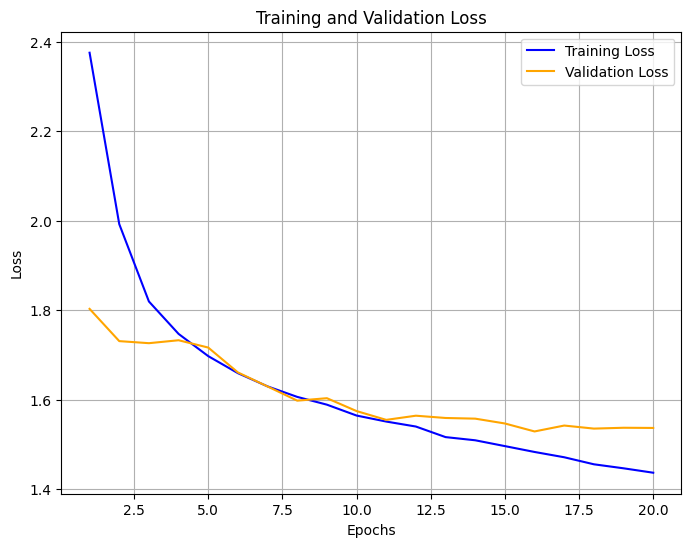

In [24]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

We connect with mlflow for logging

In [25]:
import mlflow 
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

In [26]:
print("Current tracking URI:", mlflow.get_tracking_uri())

Current tracking URI: http://127.0.0.1:8080


In [27]:
mlflow.set_experiment("Assignment 2 Final version DS")


<Experiment: artifact_location='mlflow-artifacts:/541877124317497447', creation_time=1734265756868, experiment_id='541877124317497447', last_update_time=1734265756868, lifecycle_stage='active', name='Assignment 2 Final version DS', tags={}>

We log the model.

In [28]:
from mlflow.models import infer_signature

with mlflow.start_run():
  
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("R squared", rScore)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", sqrt(mse))
    mlflow.log_metric("explained variance", exp_v)


    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info for assignment 2", "NN regression for fire in Portugal")

    # Infer the model signature
    signature = infer_signature(X_train, model.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="assignmentFTry",
        signature=signature,
        input_example=X_train,
        registered_model_name="assignmentFTry",
    )

2024/12/15 19:32:46 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\quinito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Registered model 'assignmentFTry' already exists. Creating a new version of this model...
2024/12/15 19:33:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: assignmentFTry, version 21


🏃 View run able-hog-75 at: http://127.0.0.1:8080/#/experiments/541877124317497447/runs/632e2995d28c4880928072f41cce74b2
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/541877124317497447


Created version '21' of model 'assignmentFTry'.


In case we change the scaler, this is the code we would need, changing the name of the variable "scaler" to the name we assign to our scaler.

In [29]:
"""import joblib
with mlflow.start_run():
    # Save the scaler to a file
    scaler_path = "scaler.pkl"
    joblib.dump(scaler, scaler_path)

    # Log the scaler as an artifact
    mlflow.log_artifact(scaler_path, artifact_path="scalers")

print("Scaler logged successfully.")
"""



'import joblib\nwith mlflow.start_run():\n    # Save the scaler to a file\n    scaler_path = "scaler.pkl"\n    joblib.dump(scaler, scaler_path)\n\n    # Log the scaler as an artifact\n    mlflow.log_artifact(scaler_path, artifact_path="scalers")\n\nprint("Scaler logged successfully.")\n'

We will use a library for generating new data points.

In [30]:
import sdv.single_table
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata


In [31]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(Xy)

model_GCS = GaussianCopulaSynthesizer(metadata)
model_GCS.fit(Xy)

new_data = model_GCS.sample(10)
print(new_data)


C:\Users\quinito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sdv\single_table\base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
C:\Users\quinito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0  4  3   apr  sat  94.2  212.9  843.1   8.2  24.6  27   3.6   1.0  13.66
1  2  3   oct  sun  89.2   69.8  860.2   7.6  22.8  33   4.3   2.3   7.94
2  1  6   aug  thu  87.3   39.9  664.2   2.7  13.4  52   2.2   5.9   4.78
3  6  4   sep  wed  91.0  190.9  860.6   5.9  21.6  55   2.0   6.1  28.00
4  8  5   mar  tue  89.7   91.8  858.4  10.7  23.9  27   3.8   2.5   2.29
5  7  3   aug  sun  91.0  108.0  857.2   7.3  29.3  34   3.5   2.7  11.59
6  1  4   jul  fri  91.5  146.1  859.5  10.7  23.9  44   3.0   0.0  89.44
7  8  4   aug  mon  86.9  151.3  798.0   2.2  11.4  44   2.0   3.7   0.10
8  4  4   sep  fri  89.4   69.3  242.9   6.1  24.3  27   0.9   2.1  11.71
9  4  6   may  tue  70.5   51.4  512.0   4.7  16.3  38   4.5   0.0   0.01


Now we can feed the new data points to our model and see how accurate the predictions are. 

In [39]:
import preProPortugal
X_newdata=new_data.drop(["area"],axis=1)
y_true_newdata=new_data["area"]
X_nd=X_newdata.values.tolist()
X_new=preProPortugal.encodeData(X_nd)
X_n=preProPortugal.preprocess_data(X_new)
y_pred_newdata=model.predict(X_n)
y_pred_nd_scaled =[np.exp(value) for value in y_pred_newdata]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [40]:
print(y_pred_nd_scaled)
print(y_true_newdata)

[array([1.8958936], dtype=float32), array([1.8225769], dtype=float32), array([3.1850817], dtype=float32), array([3.586929], dtype=float32), array([3.0177445], dtype=float32), array([2.5268416], dtype=float32), array([4.313853], dtype=float32), array([2.973684], dtype=float32), array([2.3057902], dtype=float32), array([1.8911632], dtype=float32)]
0    13.66
1     7.94
2     4.78
3    28.00
4     2.29
5    11.59
6    89.44
7     0.10
8    11.71
9     0.01
Name: area, dtype: float64
